In [1]:
import sys
sys.path.insert(0, "../")
from tmds import *
%matplotlib inline

2.7.12 (default, Nov 12 2018, 14:36:49) 
[GCC 5.4.0 20160609]


In [2]:
s = ["CHA", "SFA-Ctk", "SFA-Pw", "SHA-Ctk", "SHA-Pw", "SRHA"]
cities = ["a", "b", "c", "d", "e"]

In [3]:
df = pd.read_csv("data.csv", "\t")
df["abundance"] = np.log(df["abundance"])
df["H/C"] = df["H"] / df["C"]
df["O/C"] = df["O"] / df["C"]
df["DBE"] = df["C"] - df["H"]/2 + df["N"]/2 + 1
df.sample(3)

,exp,town,abundance,mw,error,C,H,O,N,S,y,H/C,O/C,DBE
72419,SFA-Pw,d,-4.443083,409.209916,-0.333814,21,31,7,1,0,1,1.476190,0.333333,7.0
121336,SRHA,a,-4.504377,551.091146,0.048359,23,21,15,1,0,1,0.913043,0.652174,14.0
43295,SFA-Ctk,d,-4.405867,796.112476,0.210474,36,28,21,0,0,3,0.777778,0.583333,23.0


In [4]:
from sklearn.metrics import r2_score

In [5]:
data = []
for i in range(6):
    data.append([])
    for j in range(5):
        data[-1].append([])
        d = df[(df["town"] == cities[j]) & (df["exp"] == s[i])]
        vc = get_flat_van_krevelen(d)
        for k in range(20):
            data[i][j].append(get_set_of_tuples_from_np(vc[k]["C H O N S".split()].values))
tuples = data

In [6]:
corr = np.zeros((6, 20, 5, 5))
for e in range(6):
    for v in range(20):
        for i in range(5):
            for j in range(5):
                try:
                    corr[e][v][i][j] = Jaccard_Needham(tuples[e][i][v], tuples[e][j][v])
                except :
                    corr[e][v][i][j] = 0

In [7]:
vc = np.zeros((6, 5, 20))
for i in range(6):
    for j in range(5):
        vc[i, j] = map(lambda x: len(x), get_flat_van_krevelen(df[(df["town"] == cities[j]) & (df["exp"] == s[i])]))

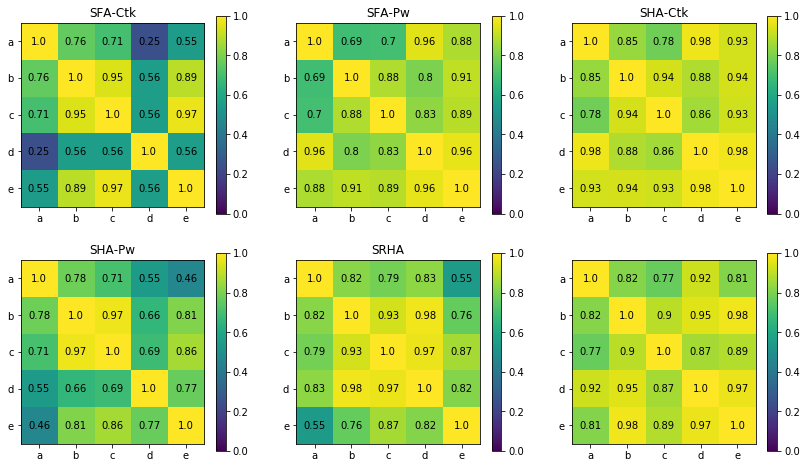

In [8]:
plt.figure(figsize=(14, 8))
for i in range(6):
    plt.title(s[i])
    plt.subplot(231+i)
    corr = np.corrcoef(vc[i])
    plt.imshow(np.corrcoef(vc[i]), vmin=0)
    plt.xticks(range(5), cities)
    plt.yticks(range(5), cities)
    
    for i in range(5):
        for j in range(5):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

In [9]:
q = np.arange(20).reshape(5, 4)
print q

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [10]:
q = np.arange(20).reshape(4, 5)
print q

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [11]:
q = np.zeros(20)
q[[6, 7, 8, 11, 12, 13]] = 1
q

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [12]:
short_vc = vc[:,:, q.astype(np.bool)]

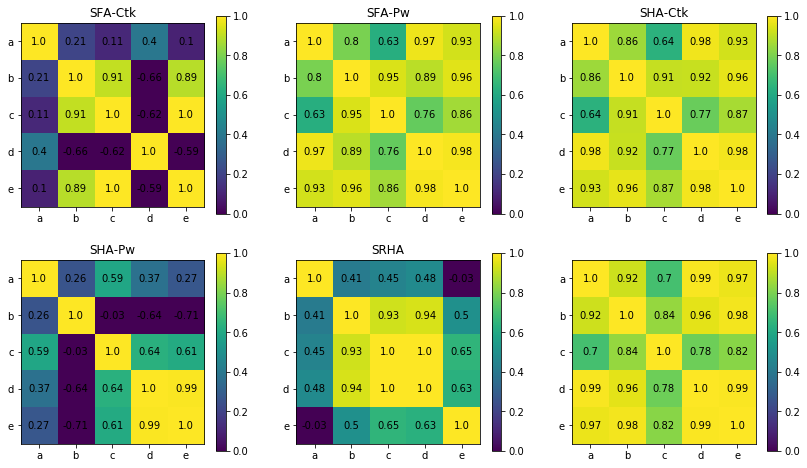

In [14]:
plt.figure(figsize=(14, 8))
for i in range(6):
    plt.title(s[i])
    plt.subplot(231+i)
    corr = np.corrcoef(short_vc[i])
    plt.imshow(np.corrcoef(short_vc[i]), vmin=0)
    plt.xticks(range(5), cities)
    plt.yticks(range(5), cities)
    
    for i in range(5):
        for j in range(5):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

In [15]:
np.arange(20).reshape(5, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [16]:
np.arange(20).reshape(4, 5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

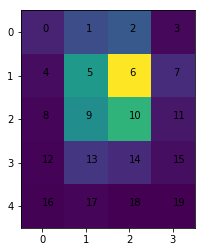

In [17]:
plt.imshow(vc[1][0].reshape(5, 4))
k = 0
for i in range(5):
    for j in range(4):
        plt.text(j, i, str(k))
        k += 1

In [19]:
q = np.zeros(20)
q[[1, 2, 5, 6, 9, 10]] = 1
short_vc = vc[:,:, q.astype(np.bool)]

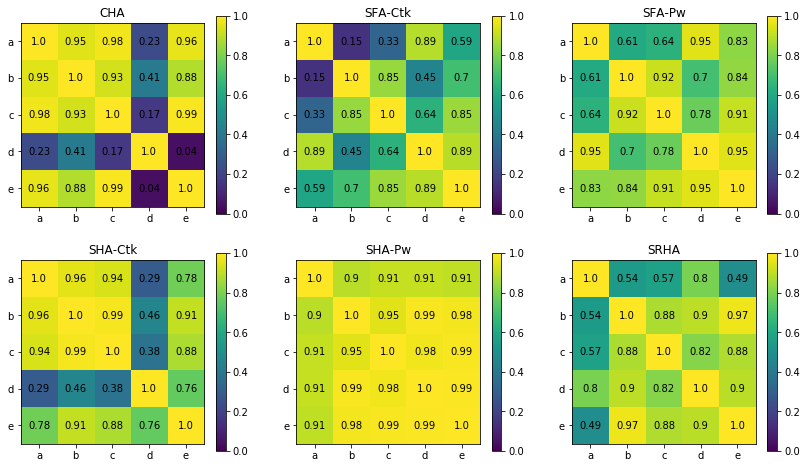

In [20]:
plt.figure(figsize=(14, 8))
for i in range(6):
    plt.subplot(231+i)
    
    plt.title(s[i])
    corr = np.corrcoef(short_vc[i])
    plt.imshow(np.corrcoef(short_vc[i]), vmin=0)
    plt.xticks(range(5), cities)
    plt.yticks(range(5), cities)
    
    for i in range(5):
        for j in range(5):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

In [55]:
short_vc.shape

(6, 5, 6)

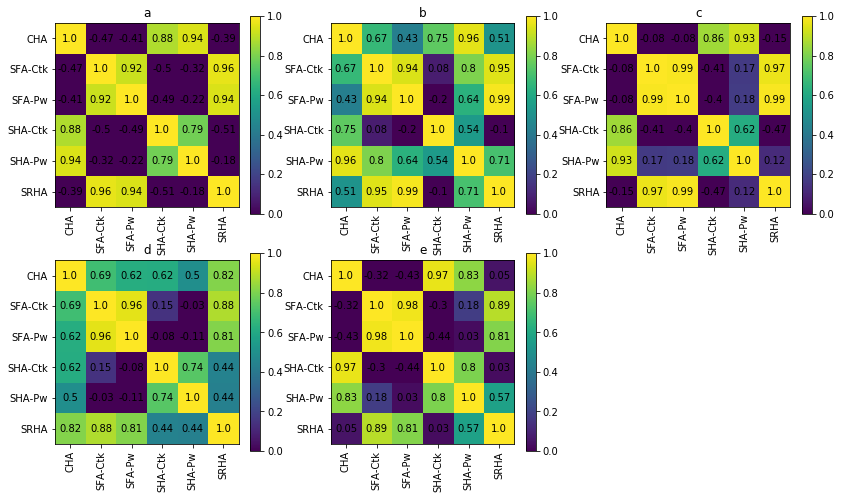

In [21]:
plt.figure(figsize=(14, 8))
for i in range(5):
    plt.subplot(231+i)
    
    plt.title(cities[i])
    corr = np.corrcoef(short_vc[:, i])
    plt.imshow(np.corrcoef(short_vc[:, i]), vmin=0)
    plt.xticks(range(6), s, rotation="vertical")
    plt.yticks(range(6), s)
    
    for i in range(6):
        for j in range(6):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

In [22]:
vc_i = np.zeros((6, 5, 20))
for i in range(6):
    for j in range(5):
        vc_i[i, j] = map(lambda x: np.sum(np.exp(x['abundance'])), get_flat_van_krevelen(df[(df["town"] == cities[j]) & (df["exp"] == s[i])]))

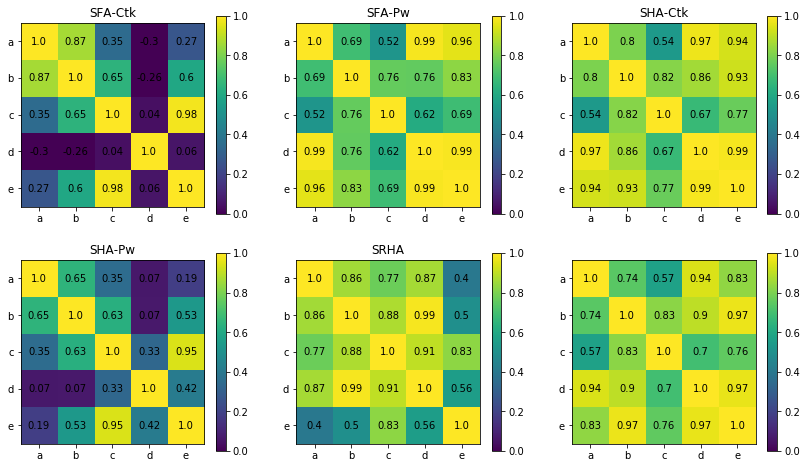

In [25]:
plt.figure(figsize=(14, 8))
for i in range(6):
    plt.title(s[i])
    plt.subplot(231+i)
    corr = np.corrcoef(vc_i[i])
    plt.imshow(np.corrcoef(vc_i[i]), vmin=0)
    plt.xticks(range(5), cities)
    plt.yticks(range(5), cities)
    
    for i in range(5):
        for j in range(5):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

In [26]:
q = np.zeros(20)
q[[1, 2, 5, 6, 9, 10]] = 1
short_vc_i = vc_i[:,:, q.astype(np.bool)]

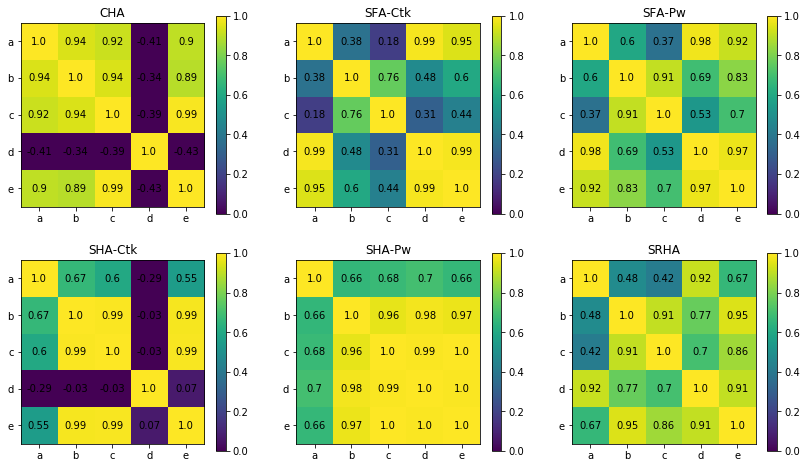

In [27]:
plt.figure(figsize=(14, 8))
for i in range(6):
    plt.subplot(231+i)
    
    plt.title(s[i])
    corr = np.corrcoef(short_vc_i[i])
    plt.imshow(np.corrcoef(short_vc_i[i]), vmin=0)
    plt.xticks(range(5), cities)
    plt.yticks(range(5), cities)
    
    for i in range(5):
        for j in range(5):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

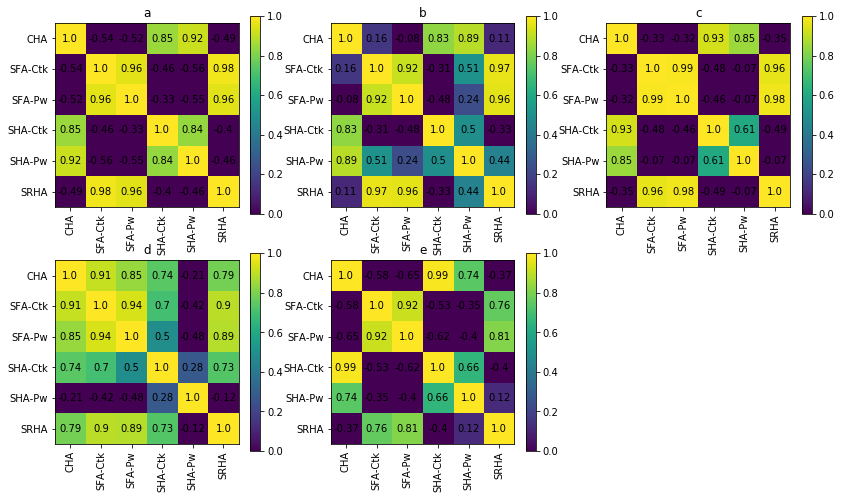

In [28]:
plt.figure(figsize=(14, 8))
for i in range(5):
    plt.subplot(231+i)
    
    plt.title(cities[i])
    corr = np.corrcoef(short_vc_i[:, i])
    plt.imshow(np.corrcoef(short_vc_i[:, i]), vmin=0)
    plt.xticks(range(6), s, rotation="vertical")
    plt.yticks(range(6), s)
    
    for i in range(6):
        for j in range(6):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()